<h2> Hands-On Activity 7.2 </h2>
<h3> Webscraping using Beautifulsoup </h3>

Performed by: Angelo Luis C. Cu

It should be noted that I do not have a camera available

In [10]:
import cv2
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

False
None


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In order for the code above to run, I have to download packages such as opencv

In [3]:
!pip3 install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.0/38.6 MB 16.0 MB/s eta 0:00:03
   -- ------------------------------------- 2.0/38.6 MB 18.1 MB/s eta 0:00:03
   --- ------------------------------------ 3.3/38.6 MB 19.2 MB/s eta 0:00:02
   ---- ----------------------------------- 4.7/38.6 MB 23.1 MB/s eta 0:00:02
   ------ --------------------------------- 6.1/38.6 MB 22.9 MB/s eta 0:00:02
   ------- -------------------------------- 7.6/38.6 MB 24.3 MB/s eta 0:00:02
   --------- ------------------------------ 8.8/38.6 MB 24.6 MB/s eta 0:00:02
   ---------- ----------------------------- 10.3/38.6 MB 26.2 MB/s eta 0:00:02
   ------------ --------------------------- 11.6/38.6 MB 28.5 MB/s eta 0:00:01
   ------------- -------------------------- 12.9/38.6 MB 28.5 MB/s eta 0:00:01
   -------------- ------------------------- 14.1/38.6 MB 28.4 MB/s eta

In [11]:
!pip3 install sounddevice

   ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
   -------------------------------------- - 194.6/199.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 199.7/199.7 kB 3.1 MB/s eta 0:00:00


In [12]:
!pip3 install wavio

In [13]:
!pip3 install scipy

As I am on windows, the !apt-get command does not work out of the box, I had to install WSL as seen below:

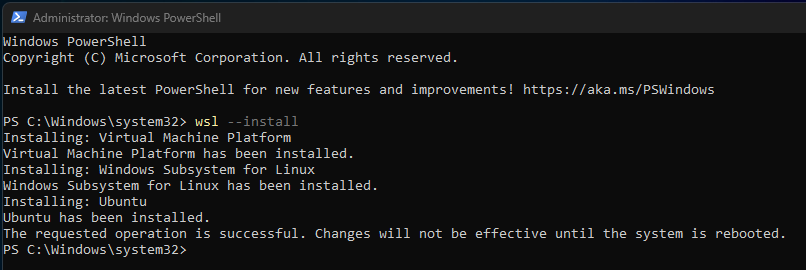

I installed the package on the ubuntu CLI:

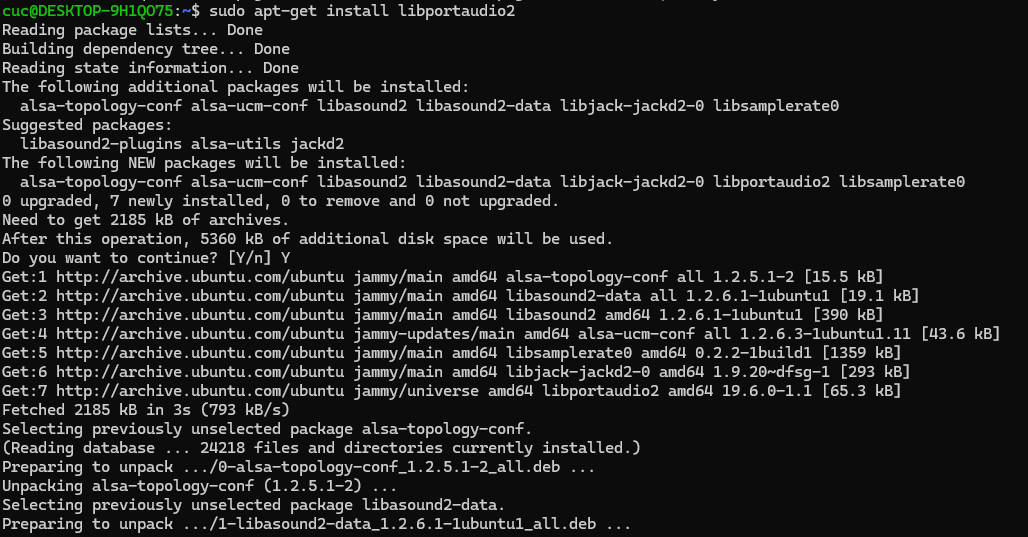

In [3]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 5

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),
samplerate=freq, channels=2)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)

In [4]:
!pip install bs4

In [5]:
!pip install requests

In [6]:
import requests
from bs4 import BeautifulSoup

def getdata(url):
    r = requests.get(url)
    return r.text

htmldata = getdata("https://www.google.com/") # website to get images from
soup = BeautifulSoup(htmldata, 'html.parser')

for item in soup.find_all('img'): # gets all <img> html element
    print(item['src']) # prints the src="" parameter

/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


In [8]:
!pip3 install selenium

I removed the !apt install chromium-chromedriver and instead installed it directly from this site: https://chromedriver.chromium.org/downloads

Starting the application:
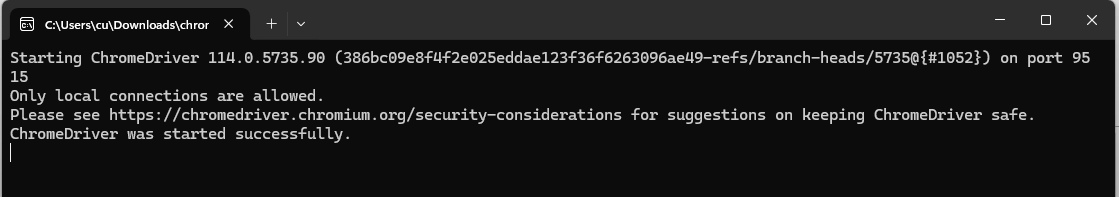

In [27]:
from selenium import webdriver
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image
user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options) # removed 'chromedriver' parameter
search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='Car'))

def scroll_to_end(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5) #sleep_between_interactions
    
def getImageUrls(name,totalImgs,driver):
    search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
    driver.get(search_url.format(q=name))
    img_urls = set()
    img_count = 0
    results_start = 0
    
    while(img_count<totalImgs): #Extract actual images now
        scroll_to_end(driver)
        thumbnail_results = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
        totalResults=len(thumbnail_results)
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")
        
        for img in thumbnail_results[results_start:totalResults]:
            img.click()
            time.sleep(2)
            actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                    img_urls.add(actual_image.get_attribute('src'))
            img_count=len(img_urls)
            if img_count >= totalImgs:
                print(f"Found: {img_count} image links")
                break
            else:
                print("Found:", img_count, "looking for more image links ...")
                load_more_button = driver.find_element_by_css_selector(".mye4qd")
                driver.execute_script("document.querySelector('.mye4qd').click();")
                results_start = len(thumbnail_results)
    return img_urls

def downloadImages(folder_path,file_name,url):
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")
        
def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)
    if totalLinks is None:
        print('images not found for :',name)
    else:
        for i, link in enumerate(totalLinks):
            file_name = f"{i:150}.jpg"
            downloadImages(path,file_name,link)
            
searchNames=['cat']
destDir='C:\\result'
totalImgs=5
saveInDestFolder(searchNames,destDir,totalImgs,driver)



Current Path C:\result\cat


AttributeError: 'WebDriver' object has no attribute 'find_elements_by_xpath'

The problem seems to be with the webdriver package by selenium, but the folder for cat was made:
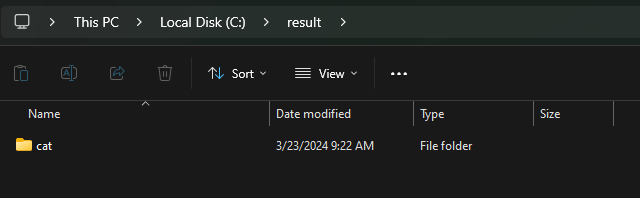

In [38]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2017-01-01,2017-12-31&sort=num_votes,desc'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'}
response = get(url, headers=headers)
print(response.text[:500])

<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
             


It seems that imdb is now not allowing the access of their website via requests without the headers, and so by inspecting element I got my user-agent header:
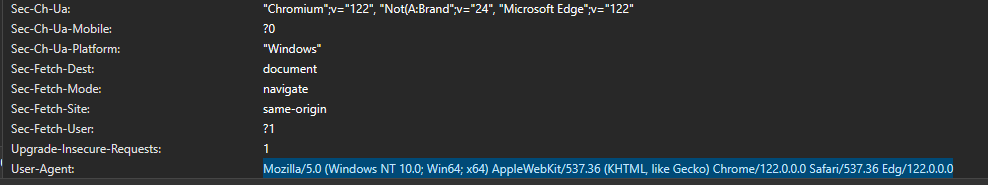

It should also be noted that the website's layout and html structure had changed since the hands-on activity. I decided to comment the changes for clarity

I am also using the 'Inspect Element' function of the browser to see how to extract the elements
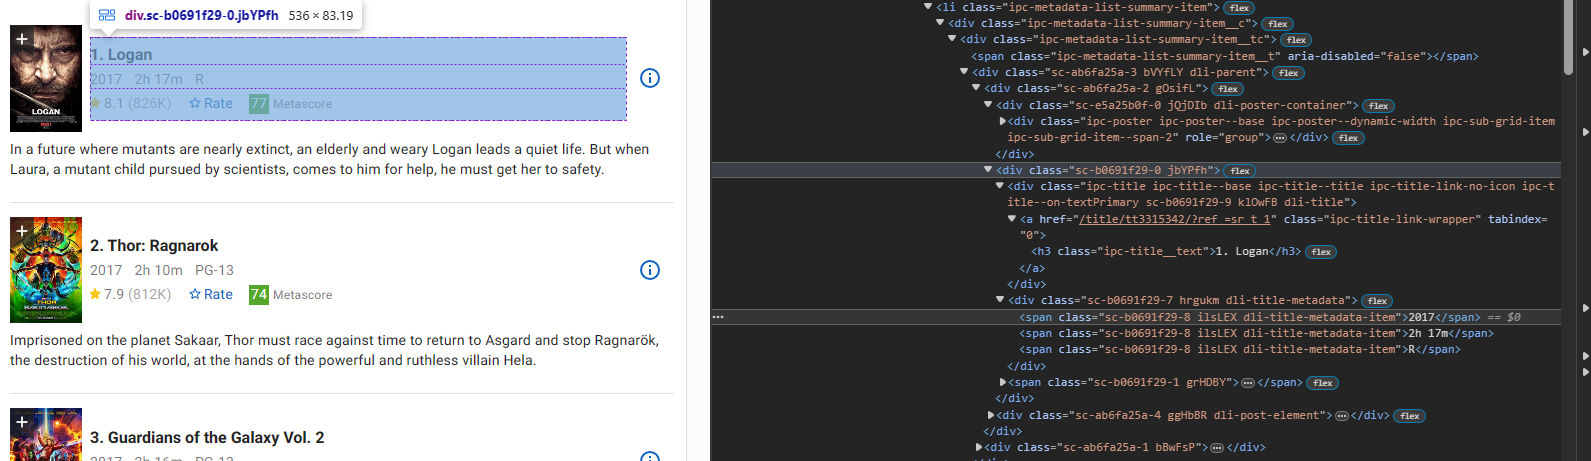

In [39]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)

bs4.BeautifulSoup

In [42]:
movie_containers = html_soup.find_all('div', class_ = 'ipc-metadata-list-summary-item__tc') # changed from lister-item mode-advanced
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [43]:
first_movie = movie_containers[0]
first_movie

<div class="ipc-metadata-list-summary-item__tc"><span aria-disabled="false" class="ipc-metadata-list-summary-item__t"></span><div class="sc-ab6fa25a-3 bVYfLY dli-parent"><div class="sc-ab6fa25a-2 gOsifL"><div class="sc-e5a25b0f-0 jQjDIb dli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7

In [44]:
first_movie.div

<div class="sc-ab6fa25a-3 bVYfLY dli-parent"><div class="sc-ab6fa25a-2 gOsifL"><div class="sc-e5a25b0f-0 jQjDIb dli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 

Getting the title

In [45]:
first_movie.a

<a aria-label="View title page for Logan" class="ipc-lockup-overlay ipc-focusable" href="/title/tt3315342/?ref_=sr_i_1"><div class="ipc-lockup-overlay__screen"></div></a>

In [46]:
first_movie.h3

<h3 class="ipc-title__text">1. Logan</h3>

In [48]:
first_movie.h3.a

In [49]:
first_name = first_movie.h3.a.text
first_name

AttributeError: 'NoneType' object has no attribute 'text'

In [53]:
# alternate way to get the title
first_movie.h3.text[3:]

'Logan'

Getting the year of release

In [54]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

In [55]:
first_year = first_year.text
first_year

AttributeError: 'NoneType' object has no attribute 'text'

In [81]:
# alternate way to get the year released
first_movie_metadata1 = html_soup.find('div', class_ = 'sc-b0691f29-7 hrgukm dli-title-metadata')
print(first_movie_metadata)

<div class="sc-b0691f29-7 hrgukm dli-title-metadata"><span class="sc-b0691f29-8 ilsLEX dli-title-metadata-item">2017</span><span class="sc-b0691f29-8 ilsLEX dli-title-metadata-item">2h 17m</span><span class="sc-b0691f29-8 ilsLEX dli-title-metadata-item">R-16</span></div>


In [82]:
first_year = first_movie_metadata1.contents[0].text
first_year

'2017'

Getting the imdb rating

In [75]:
first_movie.strong

In [76]:
first_imdb = float(first_movie.strong.text)
first_imdb

AttributeError: 'NoneType' object has no attribute 'text'

In [100]:
# alternate way to get imdb rating
first_movie_metadata2 = html_soup.find('div', class_ = 'sc-e2dbc1a3-0 ajrIH sc-b0691f29-2 bhhtyj dli-ratings-container')
print(first_movie_metadata2)

<div class="sc-e2dbc1a3-0 ajrIH sc-b0691f29-2 bhhtyj dli-ratings-container" data-testid="ratingGroup--container"><span aria-label="IMDb rating: 8.1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg class="ipc-icon ipc-icon--star-inline" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg>8.1<span class="ipc-rating-star--voteCount"> (<!-- -->826K<!-- -->)</span></span><button aria-label="Rate Logan" class="ipc-rate-button sc-e2dbc1a3-1 jboOQc ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span cl

In [106]:
first_imdb = first_movie_metadata2.contents[0].text[:3]
print(first_imdb)

8.1


Getting the metascore

In [77]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

AttributeError: 'NoneType' object has no attribute 'text'

In [107]:
# alternate way to get metascore
first_movie_metadata3 = html_soup.find('span', class_ = 'sc-b0901df4-0 bcQdDJ metacritic-score-box')
print(first_movie_metadata3)

<span class="sc-b0901df4-0 bcQdDJ metacritic-score-box" style="background-color:#54A72A">77</span>


In [108]:
first_mscore = first_movie_metadata3.text
print(first_mscore)

77


Getting the number of votes

In [78]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

In [79]:
first_votes['data-value']

TypeError: 'NoneType' object is not subscriptable

In [80]:
first_votes = int(first_votes['data-value'])

TypeError: 'NoneType' object is not subscriptable

In [112]:
# alternate way to get votes
first_votes = first_movie_metadata2.contents[0].text[5:-1]
print(first_votes)

826K


In [113]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [126]:
# alternate function
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

for container in movie_containers:
    if container.find('span', class_ = 'sc-b0901df4-0 bcQdDJ metacritic-score-box') is not None:
        name = container.h3.text[3:]
        names.append(name)
        
        temp1 = container.find('div', class_ = 'sc-b0691f29-7 hrgukm dli-title-metadata')
        year = temp1.contents[0].text
        years.append(year)
        
        temp2 = container.find('div', class_ = 'sc-e2dbc1a3-0 ajrIH sc-b0691f29-2 bhhtyj dli-ratings-container')
        imdb = float(temp2.contents[0].text[:3])
        imdb_ratings.append(imdb)
        
        temp3 = container.find('span', class_ = 'sc-b0901df4-0 bcQdDJ metacritic-score-box')
        m_score = temp3.text
        metascores.append(int(m_score))
        
        temp4 = temp2.contents[0].text[5:-1] # assuming all entries have 000K format
        vote = int(temp4[:-1]) * 1000
        votes.append(vote)


In [127]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      41 non-null     object 
 1   year       41 non-null     object 
 2   imdb       41 non-null     float64
 3   metascore  41 non-null     int64  
 4   votes      41 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,2017,8.1,77,826000
1,Thor: Ragnarok,2017,7.9,74,812000
2,Guardians of the Galaxy Vol. 2,2017,7.6,67,756000
3,Dunkirk,2017,7.8,94,736000
4,Spider-Man: Homecoming,2017,7.4,73,716000
5,Wonder Woman,2017,7.3,76,698000
6,Get Out,2017,7.8,85,691000
7,Star Wars: Episode VIII - The Last Jedi,2017,6.9,84,669000
8,Blade Runner 2049,2017,8.0,81,658000
9,Baby Driver,2017,7.5,86,605000


In [124]:
from time import time
from time import sleep
from random import randint
from IPython.core.display import clear_output
pages = [ '1','2','3','4','5']
years_url = [ '2017', '2018', '2019', '2020']
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Preparing the monitoring of the loop
start_time = time()
requests = 0
# For every year in the interval 2000-2017
for year_url in years_url:
    # For every page in the interval 1-4
    for page in pages:
        # Make a get request
        response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)
        # Pause the loop
        sleep(randint(8,15))
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:
                # Scrape the name
                name = container.h3.a.text
                names.append(name)
                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)
                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))
                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

NameError: name 'warn' is not defined

The code above did not work as there was an error earlier that states that IPython.core.display is deprecated

In [125]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      0 non-null      float64
 1   year       0 non-null      float64
 2   imdb       0 non-null      float64
 3   metascore  0 non-null      float64
 4   votes      0 non-null      float64
dtypes: float64(5)
memory usage: 132.0 bytes
None


,movie,year,imdb,metascore,votes


I used the earlier dataframe instead

In [129]:
test_df.tail(10)

,movie,year,imdb,metascore,votes
31,The Hitman's Bodyguard,2017,6.9,47,246000
32,"I, Tonya",2017,7.5,77,241000
33,King Arthur: Legend of the Sword,2017,6.7,41,231000
34,Ghost in the Shell,2017,6.3,52,227000
35,Darkest Hour,2017,7.4,75,220000
36,American Made,2017,7.1,65,207000
37,Atomic Blonde,2017,6.7,63,206000
38,The Mummy,2017,5.4,34,205000
39,Baywatch,2017,5.5,37,201000
40,Bright,2017,6.3,29,201000


In [130]:
test_df.to_csv('movie_ratings.csv')

In [131]:
test_df['year'].unique()

array(['2017'], dtype=object)

In [133]:
test_df.dtypes

movie         object
year          object
imdb         float64
metascore      int64
votes          int64
dtype: object

In [134]:
test_df['year'] = (test_df.year.apply(lambda x:x.replace('(I)','')))

In [135]:
test_df['year'].unique()

array(['2017'], dtype=object)

In [136]:
test_df['year'] = (test_df.year.apply(lambda x:x.replace('(II)','')))

In [137]:
test_df['year'].unique()

array(['2017'], dtype=object)

In [138]:
test_df['year'] = (test_df.year.apply(lambda x:x.replace('(','')))

In [139]:
test_df['year'].unique()

array(['2017'], dtype=object)

In [140]:
test_df['year'] = (test_df.year.apply(lambda x:x.replace(')','')))

In [141]:
test_df['year'].unique()

array(['2017'], dtype=object)

In [142]:
test_df['year'] = test_df['year'].astype(int)

In [143]:
test_df['year'].unique()

array([2017])

In [144]:
test_df.dtypes

movie         object
year           int32
imdb         float64
metascore      int64
votes          int64
dtype: object

In [145]:
test_df.head(10)

,movie,year,imdb,metascore,votes
0,Logan,2017,8.1,77,826000
1,Thor: Ragnarok,2017,7.9,74,812000
2,Guardians of the Galaxy Vol. 2,2017,7.6,67,756000
3,Dunkirk,2017,7.8,94,736000
4,Spider-Man: Homecoming,2017,7.4,73,716000
5,Wonder Woman,2017,7.3,76,698000
6,Get Out,2017,7.8,85,691000
7,Star Wars: Episode VIII - The Last Jedi,2017,6.9,84,669000
8,Blade Runner 2049,2017,8.0,81,658000
9,Baby Driver,2017,7.5,86,605000


In [146]:
test_df.tail(10)

,movie,year,imdb,metascore,votes
31,The Hitman's Bodyguard,2017,6.9,47,246000
32,"I, Tonya",2017,7.5,77,241000
33,King Arthur: Legend of the Sword,2017,6.7,41,231000
34,Ghost in the Shell,2017,6.3,52,227000
35,Darkest Hour,2017,7.4,75,220000
36,American Made,2017,7.1,65,207000
37,Atomic Blonde,2017,6.7,63,206000
38,The Mummy,2017,5.4,34,205000
39,Baywatch,2017,5.5,37,201000
40,Bright,2017,6.3,29,201000


In [147]:
test_df

,movie,year,imdb,metascore,votes
0,Logan,2017,8.1,77,826000
1,Thor: Ragnarok,2017,7.9,74,812000
2,Guardians of the Galaxy Vol. 2,2017,7.6,67,756000
3,Dunkirk,2017,7.8,94,736000
4,Spider-Man: Homecoming,2017,7.4,73,716000
5,Wonder Woman,2017,7.3,76,698000
6,Get Out,2017,7.8,85,691000
7,Star Wars: Episode VIII - The Last Jedi,2017,6.9,84,669000
8,Blade Runner 2049,2017,8.0,81,658000
9,Baby Driver,2017,7.5,86,605000


Performing Webscraping to Website of choice

website = https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

In [1]:
from requests import get
url = 'https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll'
response = get(url)
print(response.text[:500])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-p


In [2]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)

bs4.BeautifulSoup

In [8]:
tables = html_soup.find_all("table", class_ = "wikitable sortable") # gets all tables with information on deaths
print(tables)

[<table class="wikitable sortable">
<tbody><tr>
<th data-sort-type="number">Deaths
</th>
<th>Date
</th>
<th>Incident
</th></tr>
<tr>
<td>20,000</td>
<td><span data-sort-value="000000001626-05-30-0000" style="white-space:nowrap">30 May 1626</span>
</td>
<td><a href="/wiki/Wanggongchang_Explosion" title="Wanggongchang Explosion">Wanggongchang Explosion</a> in Beijing, China in the Wanggongchang Gunpowder Factory destroys part of the city and kills 20,000 people<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</td></tr>
<tr>
<td>3,000</td>
<td><span data-sort-value="000000001769-08-18-0000" style="white-space:nowrap">18 August 1769</span>
</td>
<td>A lightning bolt caused the <a class="mw-redirect" href="/wiki/Brescia_Explosion" title="Brescia Explosion">Brescia Explosion</a> of a gunpowder depot in <a href="/wiki/Brescia" title="Brescia">Brescia</a> (Italy), destroying one-sixth of the city<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></s

In [30]:
headers = ['Deaths', 'Date', 'Incident'] # I decided to only get the date, deaths, and incident
temp_data = [] # stores every information taken in rows

for table in tables:
    rows = table.find_all('tr')
    for row in rows[1:]:
        data = [data.text for data in row.find_all('td')[:3]] # gets the data per row
        temp_data.append(data)
print(temp_data)

[['20,000', '30 May 1626\n', 'Wanggongchang Explosion in Beijing, China in the Wanggongchang Gunpowder Factory destroys part of the city and kills 20,000 people[1]\n'], ['3,000', '18 August 1769\n', 'A lightning bolt caused the Brescia Explosion of a gunpowder depot in Brescia (Italy), destroying one-sixth of the city[2][3]\n'], ['3,000?', '1 November 1948\n', 'Boiler and ammunition explosion aboard an unidentified merchant ship evacuating troops of the Republic of China Army from Yingkou, China for Taiwan in early November 1948.[4][disputed  – discuss] Other sources suggest this figure is inaccurate.[5]\n'], ['1,400–2,280', '6 March 1862\n', 'Ammunition warehouse explodes and kills almost all of Oaxaca brigade, in San Andrés Chalchicomula, Mexico, during the first days of Second French intervention in Mexico[6]\n'], ['1,950', '6 December 1917\n', 'Halifax Explosion in Nova Scotia, Canada[7]\n'], ['1,500', '5 June 1941\n', 'Smederevo Fortress explosion of stockpiled ammunition at Smede

In [23]:
import pandas as pd
deaths_data = pd.DataFrame(temp_data, columns=headers)
deaths_data

,Deaths,Date,Incident
0,"20,000",30 May 1626\n,"Wanggongchang Explosion in Beijing, China in t..."
1,"3,000",18 August 1769\n,A lightning bolt caused the Brescia Explosion ...
2,"3,000?",1 November 1948\n,Boiler and ammunition explosion aboard an unid...
3,"1,400–2,280",6 March 1862\n,Ammunition warehouse explodes and kills almost...
4,"1,950",6 December 1917\n,"Halifax Explosion in Nova Scotia, Canada[7]\n"
...,...,...,...
441,300–405,January–February 1963\n,1963 New York City smog\n
442,300–400,December 1962\n,1962 London smog[151]\n
443,220–240,November 1953\n,1953 New York City smog\n
444,168,23–25 November 1966\n,1966 New York City smog\n


In [24]:
deaths_data["Deaths"].unique()

array(['20,000', '3,000', '3,000?', '1,400–2,280', '1,950', '1,500',
       '256–1,500+', '1,300+', '1,200', '1,121', '1,100', '1,082',
       '1,007', '1,000+', '843', '800', '738', '700', '621', '600+',
       '590', '581', '575', '565', '542', '508', '500+', '372', '370+',
       '339', '322', '300 (estimate)', '300+', '296+', '256', '235+\n',
       '234', '233', '230+', '220', '219', '218', '217', '207', '206',
       '200+', '3,787–16,000', '1,549', '1,134', '1,099', '687', '682',
       '512', '476–1,000', '458', '439', '437', '426', '422', '405',
       '388', '376', '375', '365', '362', '344', '319', '301', '299[26]',
       '290', '289', '277', '270\n', '268', '266', '263', '262', '259',
       '254', '243', '239', '236', '235', '216', '214', '210', '204',
       '202', '200–6,000\n', '100–240\n', '95–4,000+[31][32]\n', '17\n',
       '13\n', '11\n', '10\n', '26,000–240,000\n', '20,000+\n',
       '11,300\n', '1,800–25,000\n', '2,208\n', '1,134\n', '1,000+\n',
       '1,000\n

In [25]:
deaths_data['Deaths'] = (deaths_data.Deaths.apply(lambda x: int(''.join(filter(str.isdigit, str(x))))))
# cleans the deaths column by removing every non-digit character
# this has limitations such as not being able to handle ranges (600-700 for example)
deaths_data

,Deaths,Date,Incident
0,20000,30 May 1626\n,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769\n,A lightning bolt caused the Brescia Explosion ...
2,3000,1 November 1948\n,Boiler and ammunition explosion aboard an unid...
3,14002280,6 March 1862\n,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917\n,"Halifax Explosion in Nova Scotia, Canada[7]\n"
...,...,...,...
441,300405,January–February 1963\n,1963 New York City smog\n
442,300400,December 1962\n,1962 London smog[151]\n
443,220240,November 1953\n,1953 New York City smog\n
444,168,23–25 November 1966\n,1966 New York City smog\n


In [31]:
deaths_data['Date'] = (deaths_data.Date.apply(lambda x: x.strip())) # removes the \n at the end of date
deaths_data

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769,A lightning bolt caused the Brescia Explosion ...
2,3000,1 November 1948,Boiler and ammunition explosion aboard an unid...
3,14002280,6 March 1862,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[7]\n"
...,...,...,...
441,300405,January–February 1963,1963 New York City smog\n
442,300400,December 1962,1962 London smog[151]\n
443,220240,November 1953,1953 New York City smog\n
444,168,23–25 November 1966,1966 New York City smog\n


In [33]:
deaths_data['Incident'] = (deaths_data.Incident.apply(lambda x : x.strip())) # removes the \n at the end of incident
deaths_data

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769,A lightning bolt caused the Brescia Explosion ...
2,3000,1 November 1948,Boiler and ammunition explosion aboard an unid...
3,14002280,6 March 1862,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[7]"
...,...,...,...
441,300405,January–February 1963,1963 New York City smog
442,300400,December 1962,1962 London smog[151]
443,220240,November 1953,1953 New York City smog
444,168,23–25 November 1966,1966 New York City smog


In [34]:
deaths_data.dtypes

Deaths       int64
Date        object
Incident    object
dtype: object

I am unable to convert the date to the pandas datetime format as I do not know how to handle ranges such as January-February 1963 or 23-25 December 1966

In [35]:
deaths_data.to_csv('deaths_data.csv')